In [18]:
import time
import subprocess
import matplotlib.pyplot as plt

import compiler as cp


In [19]:
program_path = "./build/thd_vm_direct"


arguments = ['/Users/apple/Desktop/Fuzzingvm/program.bin']  


command = [program_path] + arguments


start_time = time.time()


subprocess.run(command)


end_time = time.time()


execution_time = end_time - start_time

print(f"The C++ program took {execution_time} seconds to run.")

5050
The C++ program took 0.012730836868286133 seconds to run.


In [20]:
program_path = "./build/thd_vm_indirect"


arguments = ['/Users/apple/Desktop/Fuzzingvm/program.bin']  


command = [program_path] + arguments


start_time = time.time()


subprocess.run(command)


end_time = time.time()


execution_time = end_time - start_time

print(f"The C++ program took {execution_time} seconds to run.")

5050
The C++ program took 0.011787176132202148 seconds to run.


In [21]:
program_path = "./build/thd_vm_routine"


arguments = ['/Users/apple/Desktop/Fuzzingvm/program.bin']  


command = [program_path] + arguments


start_time = time.time()


subprocess.run(command)


end_time = time.time()


execution_time = end_time - start_time

print(f"The C++ program took {execution_time} seconds to run.")

5050
The C++ program took 0.019923925399780273 seconds to run.


In [22]:
vm_code_template = "DT_IMMI,0,DT_STO_IMMI,0,1,DT_LOD,0,DT_ADD,DT_LOD,0,DT_INC,DT_STO,0,DT_LOD,0,DT_IMMI,{loop_count},DT_GT,DT_JZ,5,DT_PRINT,DT_END"

In [41]:
loop_counts = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

In [24]:
vm_programs = ["./build/thd_vm_routine", "./build/thd_vm_indirect", "./build/thd_vm_direct"]

In [42]:
execution_times = {vm: [] for vm in vm_programs}

55
55
55
5050
5050
5050
500500
500500
500500
50005000
50005000
50005000
705082704
705082704
705082704
1784293664
1784293664
1784293664
-2004260032
-2004260032
-2004260032
987459712
987459712
987459712


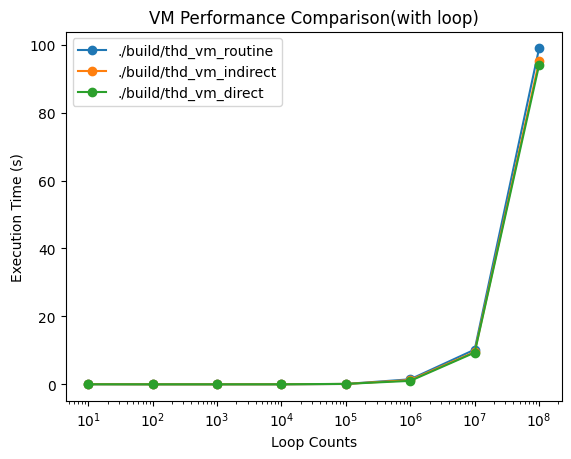

In [43]:
for count in loop_counts:
    vm_code = vm_code_template.format(loop_count=count)
    cp.binary(vm_code)
    
    for vm_program in vm_programs:
        start_time = time.time()
        subprocess.run([vm_program, "program.bin"])
        end_time = time.time()
        execution_times[vm_program].append(end_time - start_time)

for vm_program, times in execution_times.items():
    plt.plot(loop_counts, times, marker='o', label=vm_program)

plt.xscale('log') 
plt.xlabel('Loop Counts')
plt.ylabel('Execution Time (s)')
plt.title('VM Performance Comparison(with loop)')
plt.legend()
plt.show()

In [44]:
print(execution_times)

{'./build/thd_vm_routine': [0.028923749923706055, 0.0053102970123291016, 0.006834268569946289, 0.01459193229675293, 0.10991907119750977, 1.4907128810882568, 10.227607011795044, 98.92516016960144], './build/thd_vm_indirect': [0.035974979400634766, 0.006515979766845703, 0.006492137908935547, 0.016061782836914062, 0.11834406852722168, 1.2532830238342285, 9.54233193397522, 95.15445113182068], './build/thd_vm_direct': [0.02149486541748047, 0.006124019622802734, 0.005473136901855469, 0.013946771621704102, 0.13631296157836914, 1.0226128101348877, 9.351232051849365, 94.02672123908997]}


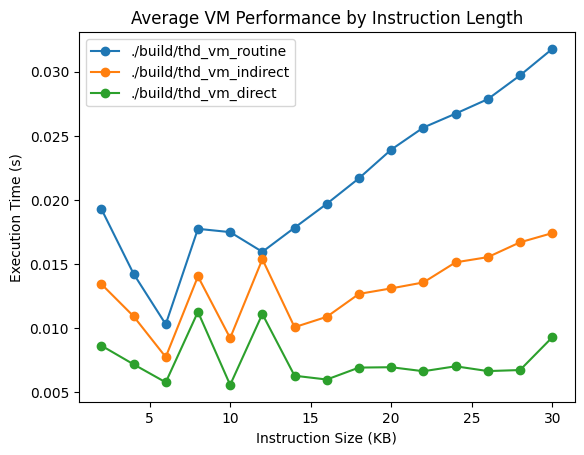

In [53]:
sizes_kb = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30]
instruction_size = 4
num_repeats = 10
execution_times = {vm: [] for vm in vm_programs}
for size_kb in sizes_kb:
    num_instructions = (size_kb * 1024) // instruction_size
    # Assuming DT_INC instruction is used, but this can be changed as needed
    vm_code = "DT_IMMI,1," * num_instructions
    vm_code = vm_code.rstrip(',')
    cp.binary(vm_code)
    for vm_program in vm_programs:
        repeat_times = []
        for _ in range(num_repeats):
            start_time = time.time()
            subprocess.run([vm_program, "program.bin"])
            end_time = time.time()
            repeat_times.append(end_time - start_time)
        average_time = sum(repeat_times) / num_repeats
        execution_times[vm_program].append(average_time)
for vm_program, times in execution_times.items():
    plt.plot(sizes_kb, times, marker='o', label=vm_program)

plt.xlabel('Instruction Size (KB)')
plt.ylabel('Execution Time (s)')
plt.title('Average VM Performance by Instruction Length')
plt.legend()
plt.show()